# Open3d

In [75]:
# TODO: 
# buscar hacerlo interactivo 

In [1]:
import os
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
from symlink import symbolic_dir
from tesselation import hinter_sampling
from dataset_download import download_collection

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
download_collection(owner_name="GoogleResearch", collection_name="Scanned Objects by Google Research", folder="obj")

In [1]:
# in case you want to capture multiple poses
if os.path.lexists("poses.npy") == False:
    from tesselation import hinter_sampling
    poses, _ = hinter_sampling(50, radius = 1)
    np.save("poses.npy", poses)
    print("teselando")

NameError: name 'os' is not defined

In [2]:
fov = 20
img_H = 100
img_W = 100
up = [0, 1, 0] #ortogonal vector between eye and center #verify
cent = [0,0,0] # where the camera see's 
eye = [0.5,0.2,0.0] #Where the camera is

In [3]:
print("Ingresa la dirección a la carpeta contenedora del banco de datos")
direccion = input("Cúal es la dirección a la carpeta contenedora?:") # Dataset access
carpeta = input("A que carpeta quieres acceder?: ") #object folder
dir_carpeta = '../../ProyectoPHD/' + direccion + carpeta
if os.path.lexists(dir_carpeta + "/meshes/texture.png") == False:
    symbolic_dir(dir_carpeta)
    RGB = "/RGB"
    Depth = "/Depth"
    Point_cloud = "/Point_cloud"
    os.mkdir(dir_carpeta + RGB)
    os.mkdir(dir_carpeta + Depth)
    os.mkdir(dir_carpeta + Point_cloud)

Ingresa la dirección a la carpeta contenedora del banco de datos


In [4]:
cube = o3d.io.read_triangle_mesh( dir_carpeta + '/meshes/model.obj', True)
cube = o3d.t.geometry.TriangleMesh.from_legacy(cube)
material = o3d.visualization.rendering.MaterialRecord() # Create material
material.albedo_img = o3d.io.read_image(dir_carpeta + '/meshes/texture.png') # Add texture
cube.translate([0,0,0]) # translate to world CF origin

TriangleMesh on CPU:0 [4303 vertices (Float32) and 8362 triangles (Int64)].
Vertex Attributes: normals (dtype = Float32, shape = {4303, 3}).
Triangle Attributes: texture_uvs (dtype = Float32, shape = {8362, 3, 2}).

In [5]:
# Create a scene and add the triangle mesh
render = o3d.visualization.rendering.OffscreenRenderer(width=img_W, height=img_H) #Linux only
render.scene.add_geometry(name = 'cube', geometry = cube, material = material)

[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x5f78f40 (threading is enabled)
EGL(1.5)
OpenGL(4.1)


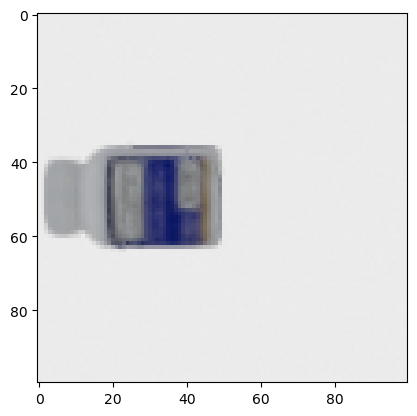

In [12]:
# Camera setup also could be possible with the extrinsic and extrinsinc matrices 
render.setup_camera(fov,cent,eye,up) #set the camera for capture
img = render.render_to_image() # render RGB image
plt.imshow(img)

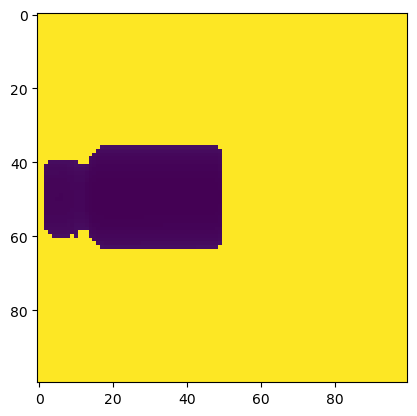

In [22]:
img1 = render.render_to_depth_image() # render RGB image
plt.imshow(img1)

# Pruebas

In [67]:
x = np.asarray(cube.get_oriented_bounding_box())

In [71]:
cube.get_center().numpy()

array([0.00071825, 0.00016994, 0.04763809], dtype=float32)

In [55]:
points,_ = hinter_sampling(1000, radius=3.0)

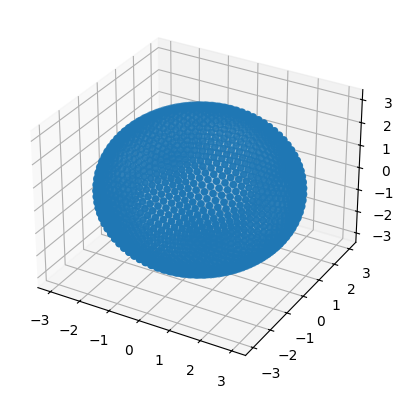

In [56]:
pp.figure().add_subplot(111, projection='3d').scatter(points[:,0], points[:,1], points[:,2])
pp.show()